## Natural Language Processing Project

Overview:

I used python, Pandas, TextBlob, and Textatistic to analyze the transcript of the Trump/Biden 2020 Presidential Debate, splitting text into separate speakers and analyzing the Trump corpus and the Biden corpus separately.

I used the 2020 Presidential Debate data set from Kaggle (https://www.kaggle.com/datasets/gpreda/usa-presidential-debate-2020). I have downloaded the data set and am accessing a local copy of the file.

I report the top 30 most often used words by each presidential candidate as well as generate a bar chart of these words, report some scores to determine the "reading level" of each participant of the debate.

### Code

In [1]:
# Install necessary dependencies
from pathlib import Path   # to open file
from textblob import TextBlob
from nltk.tokenize import BlanklineTokenizer  # to split into paragraphs
from nltk.corpus import stopwords  # stop words to remove
from operator import itemgetter
import pandas as pd
import matplotlib.pyplot as plt
from textatistic import Textatistic

#### First Step: Open the file

In [2]:
def read_file(filename):
    ''' given a file name, read the file, split the text into paragraphs, 
        and return paragraphs as a list of strings '''
    # read file
    raw_text = Path(filename).read_text()
    # define tokenizer
    tokenizer = BlanklineTokenizer()
    # create a blob from the raw text
    blob = TextBlob(raw_text)
    # split text into paragraphs
    para_list = blob.tokenize(tokenizer)
    
    return para_list

##### Manual code test

In [4]:
# read_file('presidential_debate_transcript.txt')

#### Second Step:  Data Munging: Split the paragraph list into separate lists for each person speaking

In [5]:
def split_into_candidates(list_of_paragraphs):
    ''' Looking at just the first word of each paragraph, split them into
        lists of paragraphs that BEGIN with TRUMP: and BIDEN:, then return
        a two tuple of lists of the paragraphs, with the Trump list first '''
    # initialize variables
    trump_paras = []
    biden_paras = []
    # interate through paragraph list
    for paragraph in list_of_paragraphs:
        # if paragraph starts with trump, add to a list of trump paragraphs
        if paragraph.startswith('TRUMP: '):
            trump_paras.append(paragraph)
        # if paragraph starts with biden, add to a list of biden paragraphs
        elif paragraph.startswith('BIDEN: '):
            biden_paras.append(paragraph)
    
    # return tuple of lists, Trump first
    return (trump_paras, biden_paras)

##### Manual code test

In [5]:
# paragraphs = read_file('debate_test.txt')

# split_into_candidates(paragraphs)

#### Third Step: More Data Munging: remove stop words and speaker names and the odd word "n't"

In [6]:
def clean_corpus(text, candidate_name):
    ''' process the text (a list of paragraphs), removing (1) stop words, 
        (2) the candidates name, and (3) the word "n't".  
        Return the final list of words.'''
    # join paragraphs into one string
    delim = ' '
    str_text = delim.join(text)
    
    # create blob from the text (as a string)
    candidate_blob = TextBlob(str_text)
    
    # get list of words and their counts
    word_counts = candidate_blob.word_counts.items()
    
    # remove stop words
    stop_words = stopwords.words('english')
    words_no_stops = [word for word in word_counts if word[0] not in stop_words]
    
    # remove candidate name
    words_no_name = [word for word in words_no_stops if word[0] != candidate_name.lower()]
    
    # remove weird word n't
    words_final = [word for word in words_no_name if word[0] != "n't"]
    
    return words_final

##### Manual code test

In [7]:
# paragraphs = read_file('debate_test.txt')
# split_text = split_into_candidates(paragraphs)

# clean_corpus(split_text[1], 'Biden')

#### Fourth Step: Generate a bar chart for the top 30 words

In [7]:
def create_bar_chart(word_list, candidate_name):
    ''' Plot a bar chart of the top 30 words used by a particular candidate '''
    # make candidate name all caps
    candidate_name = candidate_name.upper()
    # sort list of words from most used to least used
    sorted_words = sorted(word_list, key=itemgetter(1), reverse=True)
    # select only 30 most often used words
    top_30 = sorted_words[0:30]
    # create a dataframe from the list of top 30 words and their counts
    df = pd.DataFrame(top_30, columns=[candidate_name + ' words', candidate_name + ' count'])
    print("\n", df)
    axes = df.plot.bar(x=0, y=1, title='Presidential Debate 2020', legend=False)

##### Manual code test

In [9]:
# paragraphs = read_file('presidential_debate_transcript.txt')
# split_text = split_into_candidates(paragraphs)
# clean_words = clean_corpus(split_text[0], 'Trump')
# create_bar_chart(clean_words, 'Trump')

#### Fifth Step:  Determine the "reading level" scores of the debate text of each participant.

In [8]:
def readability(text_list):
    ''' report the 3 readability scores for the given text_string '''
    # join paragraphs into one string
    delim = ' '
    str_text = delim.join(text_list)
    
    # create Textatistic object
    scores = Textatistic(str_text)
    
    # save the three readability scores in variables
    FK = scores.fleschkincaid_score
    smog = scores.smog_score
    GF = scores.gunningfog_score

    return (FK, smog, GF)

##### Manual code test

In [11]:
# paragraphs = read_file('presidential_debate_transcript.txt')
# split_text = split_into_candidates(paragraphs)
# print("TRUMP: ", readability(split_text[0]))
# print("BIDEN: ", readability(split_text[1]))

#### Sixth Step: Pulling it all together in main()

In [9]:
def main():
    ''' Obtain a file name from the user, open the file and analyze the text by speaker '''
    
    while True:
        # obtain name of file from user, with error handling
        try:
            # save file name from user
            file = input("Enter the name of a file you would like to analyze: ")
            # try to open, read file, and tokenize it
            paragraphs = read_file(file)
        except FileNotFoundError:
            print("There is no file by that name. Please try again.")
        else:
            break
        
    # split list of paragraphs into two list by which candidate said them
    candidates = split_into_candidates(paragraphs)
    
    # clean corpus for each candidate
    trump_words = clean_corpus(candidates[0], "Trump")
    biden_words = clean_corpus(candidates[1], "Biden")
    
    # create bar chart for each candidate's top 30 words
    create_bar_chart(trump_words, "Trump")
    create_bar_chart(biden_words, "Biden")
    
    # obtain reading level scores for each candidate
    trump_scores = readability(candidates[0])
    biden_scores = readability(candidates[1])
    
    # report reading level scores for each candidate
    print(f'\nfor TRUMP: \nFlesch-Kincaid score: {trump_scores[0]:.2f} \nSimple Measure of Gobbledygook score: {trump_scores[1]:.2f} \nGunning Fog score: {trump_scores[2]:.2f}')
    print(f'\nfor BIDEN: \nFlesch-Kincaid score: {biden_scores[0]:.2f} \nSimple Measure of Gobbledygook score: {biden_scores[1]:.2f} \nGunning Fog score: {biden_scores[2]:.2f}')


Enter the name of a file you would like to analyze: asdf
There is no file by that name. Please try again.
Enter the name of a file you would like to analyze: presidential_debate_transcript.txt

    TRUMP words  TRUMP count
0       people           46
1        would           36
2         want           33
3         know           30
4          joe           24
5         well           24
6         said           24
7         look           24
8        going           23
9        think           22
10          go           18
11        good           17
12     million           17
13         got           17
14        done           17
15        like           16
16         say           15
17    military           15
18        left           15
19          ph           14
20        tell           14
21         see           14
22     dollars           14
23          oh           14
24        much           13
25     country           13
26         one           13
27       never       

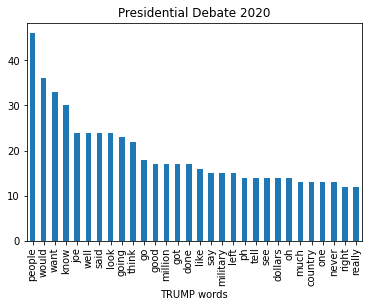

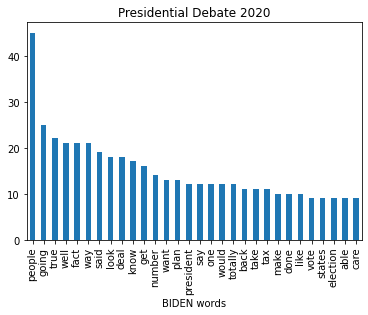

In [10]:
# Call to main function
main()